# P8 Déployez un modèle dans le cloud

1. Importation des librairies
2. Découverte du dataset
3. Preprocessing
4. Réduction de dimension

## I. Importation des librairies et chargement des données

In [3]:
import os

In [1]:
import numpy as np

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/home/clalbertini7/anaconda3/lib/python3.5/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [5]:
import findspark
findspark.init()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: module 'numpy' has no attribute 'putmask'

In [8]:
from tensorflow import keras

ImportError: No module named 'numpy.core._multiarray_umath'

AttributeError: module 'numpy' has no attribute 'integer'

In [42]:
# Pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.types import ArrayType, IntegerType, FloatType, StringType
from pyspark.sql.functions import split, col, udf
from pyspark.ml.feature import PCA
from pyspark.ml.feature import StandardScaler, StringIndexer
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors, VectorUDT

from PIL import Image
import io
from urllib.parse import unquote
#Tensorflow 
#import ResNet50
#from keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
#from tensorflow.keras.preprocessing.image import img_to_array

Chargement des données

In [4]:
# https://cloud.google.com/storage/docs/reference/libraries

from google.cloud import storage
# Instantiates a client
storage_client = storage.Client()

# The name for the new bucket
bucket_name = "fruits-data"

# une variable qui référence le bucket fruites-data afin de pouvoir interagir avec 
bucket = storage_client.get_bucket(bucket_name)

In [5]:
# Get blobs in bucket (including all subdirectories)
blobs_test = list(bucket.list_blobs(prefix='fruits-360_dataset/fruits-360/Test'))

## II. Découverte du dataset

1. bytes vers objet RDD (librairie UDF)construire une fonction qui permet d'ouvrir l'image et de retourner l'image: utiliser la librairie PIL from PIL import Image, Image.open(io.BytesIO()), resize image 224*224(conseillé pour les réseaux de neuronnes)

len(blobs_test)

In [6]:
blob_limited = blobs_test[:10]

In [7]:
blobs_test[0]

<Blob: fruits-data, fruits-360_dataset/fruits-360/Test/Apple Braeburn/321_100.jpg, 1643326881690396>

In [16]:
blobs_test[1].content_type

'image/jpeg'

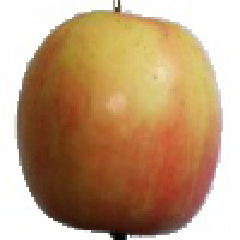

In [32]:
Image.open(io.BytesIO(blobs_test[1000].download_as_bytes())).resize([240, 240])

In [16]:
#for blob in blob_limited:
#    file_name = blob.name.replace("fruits-360_dataset/fruits-360/Test/Apple Braeburn/", "")
#    blob.download_to_filename(file_name)

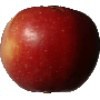

In [26]:
Image.open(io.BytesIO(blobs_test[10].download_as_bytes()))

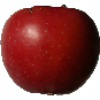

In [27]:
Image.open(io.BytesIO(blobs_test[50].download_as_bytes()))

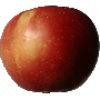

In [28]:
Image.open(io.BytesIO(blobs_test[70].download_as_bytes()))

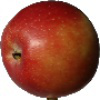

In [29]:
Image.open(io.BytesIO(blobs_test[90].download_as_bytes()))

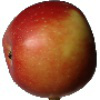

In [30]:
Image.open(io.BytesIO(blobs_test[110].download_as_bytes()))

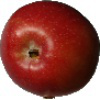

In [31]:
Image.open(io.BytesIO(blobs_test[130].download_as_bytes()))

Voir nombre de fruits/catégories différentes

In [23]:
# taille des images
image1.size

(100, 100)

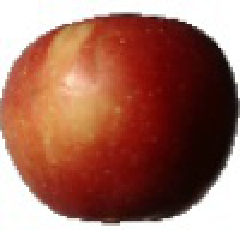

In [24]:
image1.resize((240, 240))

Resizer toutes les images à 240*240

In [51]:
def resize_and_features(blob):
    img = Image.open(io.BytesIO(blob.download_as_bytes())).resize([240, 240])
    nom_fruit = unquote(blob.public_url.split("/")[-2])
    return img, nom_fruit

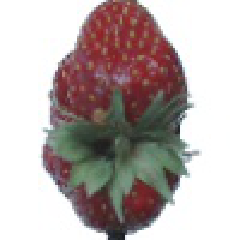

In [52]:
resize_and_features(blobs_test[20000])[0]

In [53]:
resize_and_features(blobs_test[20000])[1]

'Strawberry Wedge'

Faire dataframe/split?

## III. Preprocessing

2. Importer modèle ResNet50, modele summury pour le nombre de couches (expliquer dans pres)/ présentation: expliquer qq elets du resnet50
3. Enlever la derniere couches, récup sortie avant dernière couche pour extraire les features

Importer le modèle ResNet50

Importation du modèle à partir de keras mais sans couche supérieure (classificateur), car nous voulons uniquement que ce modèle extraie les features.

In [1]:
model = ResNet50(include_top=False)

NameError: name 'ResNet50' is not defined

## IV. Réduction de dimension

4. appliquer sandart scaler Puis faire PCA
le transformer par une fonction / ou créer un pyspark dataframe pour récup les features.
5. tracer la cumulative explained variance
6. affiches image originale et l'image reconstruire à partir de la PCA

In [ ]:
app_enc = app_enc.sample(10000)
pca = PCA()
scaler_text = StandardScaler()
pca.fit(scaler_text.fit_transform(app_enc.fillna(0).replace([-np.inf, np.inf],0)))

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.axhline(y=0.8, color='#02CA91', linestyle='-')
plt.axhline(y=0.9, color='#efefef', linestyle='-')
plt.plot(list(range(app_enc.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))